# CourseWork Yunus Erdis W1841618

Data and Library Import

In [451]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl
import scipy.stats as si

In [6]:
data = yf.download("FB", start="2020-11-01", end="2021-11-01") #I choose Facebook as the stock

[*********************100%***********************]  1 of 1 completed


In [7]:
data.tail() #show initial 5 row of stock data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-25,320.299988,329.559998,319.720001,328.690002,328.690002,38409000
2021-10-26,328.260010,330.209991,309.600006,315.809998,315.809998,65654000
2021-10-27,314.190002,319.250000,312.059998,312.220001,312.220001,29971800
2021-10-28,312.989990,325.519989,308.109985,316.920013,316.920013,50806800
2021-10-29,320.190002,326.000000,319.600006,323.570007,323.570007,37059400


In [8]:
data.head() #show last 5 row of data 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-02,264.600006,270.470001,257.339996,261.359985,261.359985,27165700
2020-11-03,263.160004,270.049988,260.880005,265.299988,265.299988,17961900
2020-11-04,281.000000,288.940002,278.619995,287.380005,287.380005,35364400
2020-11-05,291.899994,297.380005,288.950012,294.679993,294.679993,23823600
2020-11-06,293.950012,294.600006,288.059998,293.410004,293.410004,13891000


#                           Normal & Log Return and Annulized Volatility

In [9]:
normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = ((adjclose_today - adjclose_yesterday) / adjclose_yesterday).round(2)
    normal_return.append(x)
normal_return[:5] #show normal return 

[0.02, 0.08, 0.03, -0.0, -0.05]

In [10]:
log_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday).round(2)
    log_return.append(y)
log_return[:5] #show log return

[0.01, 0.08, 0.03, -0.0, -0.05]

The logarithmic return is one of the most used way of calculating the rate of return on an investment.

In [11]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.4f and its annulized volatility is %.4f' % (nr,nv))

The annulized normal return is 0.2500 and its annulized volatility is 0.2980


In [12]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.4f and its annulized volatility is %.4f' % (lr,lv)) #I used vol as 30% in formulas

The annulized log return is 0.2100 and its annulized volatility is 0.2978


Volatility is measured by calculating the standard deviation of the annualized returns over a given period of time. It shows the range to which the price of a security may increase or decrease. Therefore, it is important to know it before creating option strategy to be aware of the risk.

#                                      Visulation

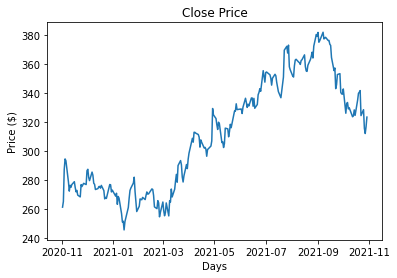

In [13]:
fig = plt.figure()
plt.plot(data['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Close Price');

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

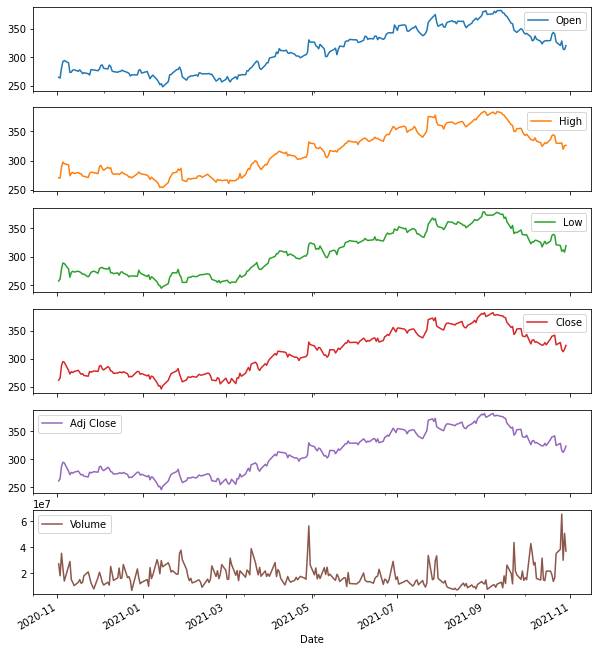

In [14]:
data.plot(figsize=(10, 12), subplots=True)

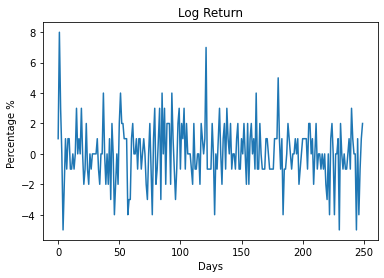

In [15]:
fig = plt.figure()
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');


# Changes over Time

In [16]:
df=data['Adj Close'] #df now become a data series
df.describe().round(2) #data statistics

count    251.00
mean     311.55
std       37.80
min      245.64
25%      274.75
50%      312.46
75%      342.45
max      382.18
Name: Adj Close, dtype: float64

In [17]:
data['Adj Close'].head().round(2) #show first 5 row of stock data 

Date
2020-11-02    261.36
2020-11-03    265.30
2020-11-04    287.38
2020-11-05    294.68
2020-11-06    293.41
Name: Adj Close, dtype: float64

In [18]:
data.diff().head().round(2) #show first 5 row of data difference first line nan because there is prior data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-03,-1.44,-0.42,3.54,3.94,3.94,-9203800.0
2020-11-04,17.84,18.89,17.74,22.08,22.08,17402500.0
2020-11-05,10.90,8.44,10.33,7.30,7.30,-11540800.0
2020-11-06,2.05,-2.78,-0.89,-1.27,-1.27,-9932600.0


In [19]:
df.diff().head().round(2)

Date
2020-11-02      NaN
2020-11-03     3.94
2020-11-04    22.08
2020-11-05     7.30
2020-11-06    -1.27
Name: Adj Close, dtype: float64

In [20]:
df.diff().describe().round(2) #describe data difference

count    250.00
mean       0.25
std        5.77
min      -17.27
25%       -3.33
50%        0.06
75%        4.03
max       22.41
Name: Adj Close, dtype: float64

In [21]:
rets = np.log(df / df.shift(1))
rets.head().round(4)

Date
2020-11-02       NaN
2020-11-03    0.0150
2020-11-04    0.0799
2020-11-05    0.0251
2020-11-06   -0.0043
Name: Adj Close, dtype: float64

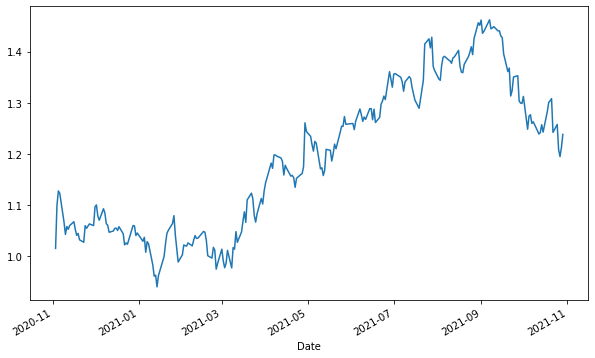

In [22]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [23]:
ret=np.log(df/df.shift(1)) #calculate log return
data=pd.concat([df,ret], axis=1) #combine two series and crate a data frame 
data.columns=['Price', 'Return'] #rename columns
data.dropna(inplace=True) #drop na values
data.tail().round(2)

,Price,Return
Date,,
2021-10-25,328.69,0.01
2021-10-26,315.81,-0.04
2021-10-27,312.22,-0.01
2021-10-28,316.92,0.01
2021-10-29,323.57,0.02


In [24]:
Price = df[-1] #last entry of data - last price
print('The spot price is', round(Price,2))

The spot price is 323.57


#                                    Rolling Statistics


Rolling is a very useful operation for time series data. Rolling means creating a rolling window with a specified size and perform calculations on the data in this window which, of course, rolls through the data.

In [25]:
w=10    # 10 days moving average is used to get more significant results. 
data['min'] = data['Price'].rolling(w).min()
data['max'] = data['Price'].rolling(w).max()
data['std'] = data['Price'].rolling(w).std()
data['mean'] = data['Price'].rolling(w).mean()
data['median'] = data['Price'].rolling(w).median()
data['ewma'] = data['Price'].ewm(halflife=0.5, min_periods=14).mean()
data.dropna().head().round(2)

,Price,Return,min,max,std,mean,median,ewma
Date,,,,,,,,
2020-11-20,269.70,-0.01,269.70,278.96,3.05,274.83,275.04,270.51
2020-11-23,268.43,-0.00,268.43,278.96,3.31,273.79,273.97,268.95
2020-11-24,276.92,0.03,268.43,278.96,3.40,274.24,275.04,274.93
2020-11-25,275.59,-0.00,268.43,278.96,3.35,274.15,275.04,275.42
2020-11-27,277.81,0.01,268.43,278.96,3.54,274.43,275.29,277.21


#                               Price & Return Changes Figures

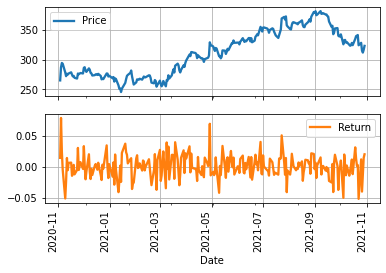

In [26]:
data[['Price','Return']].plot(subplots=True, lw=2.3, grid=True)
plt.xticks(rotation=90)
plt.show()

#                                   Cumulative Returns

The cumulative return is the total change in the investment price over a set time—an aggregate return, not an annualized one. Reinvesting the dividends or capital gains of an investment impacts its cumulative return.

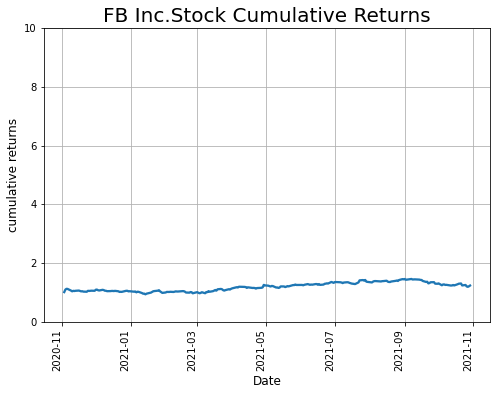

In [27]:
data['Return'].cumsum().apply(np.exp).plot(figsize=(8, 6), lw=2.3)
plt.grid(True)
plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=12)
plt.title('FB Inc.Stock Cumulative Returns', fontsize=20)
plt.ylabel('cumulative returns',fontsize=12)
plt.ylim(0,10)
plt.show()

#                                Distribution and Description of Stock Return

The probability distribution of a time series describes the probability that an observation falls into a specified range of values.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


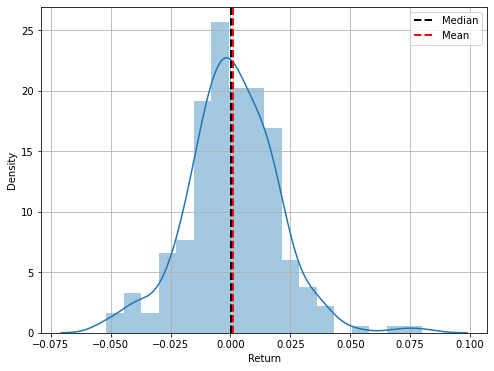

In [28]:
plt.figure(figsize=(8,6))
ax=sns.distplot(data['Return'])
ax.axvline(data['Return'].median(), color='black', ls='--', label='Median',lw=2)
ax.axvline(data['Return'].mean(), color='red', ls='--', label='Mean',lw=2)
plt.legend(loc=0)
plt.grid(True)

In [29]:
data['Return'].describe()

count    250.000000
mean       0.000854
std        0.018862
min       -0.051835
25%       -0.010587
50%        0.000234
75%        0.012736
max        0.079944
Name: Return, dtype: float64

#                                  Simple Moving Average (SMA)

The Simple Moving Average (SMA) is calculated by adding the price of an instrument over a number of time periods and then dividing the sum by the number of time periods.

In [30]:
SMA1=5
SMA2=20
data['SMA1'] = data['Price'].rolling(window=SMA1).mean()
data['SMA2'] = data['Price'].rolling(window=SMA2).mean()
data[['Price', 'SMA1', 'SMA2']].tail().round(2)

,Price,SMA1,SMA2
Date,,,
2021-10-25,328.69,335.19,332.66
2021-10-26,315.81,330.35,331.41
2021-10-27,312.22,324.64,330.04
2021-10-28,316.92,319.65,328.92
2021-10-29,323.57,319.44,327.95


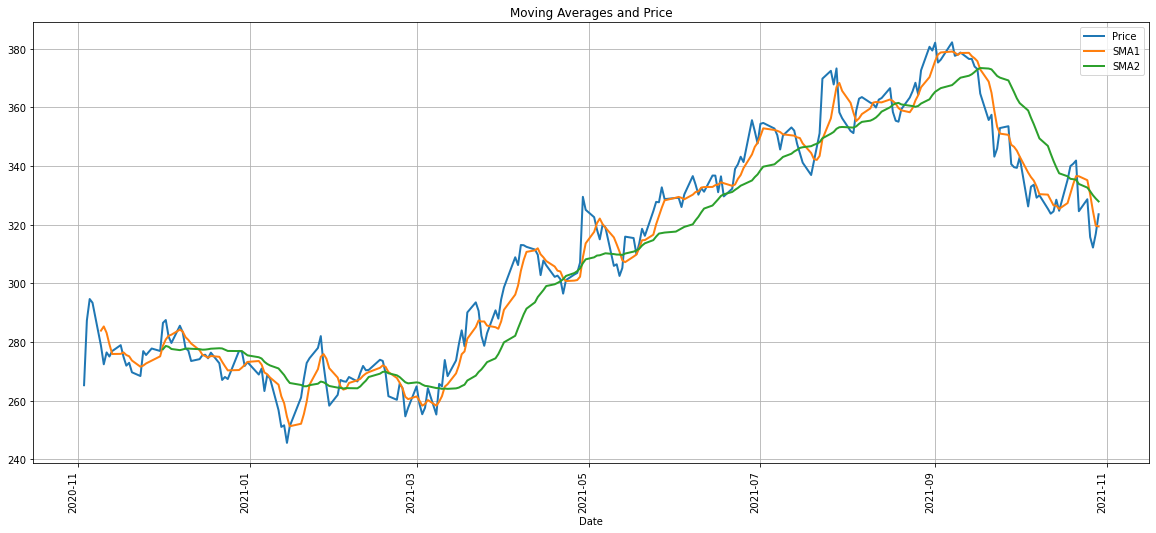

In [31]:
SMA1=5
SMA2=20
data['SMA1'] = data['Price'].rolling(window=SMA1).mean()
data['SMA2'] = data['Price'].rolling(window=SMA2).mean()
data[['Price', 'SMA1', 'SMA2']].plot(figsize=(20,9), grid=True, lw=2)
plt.title('Moving Averages and Price')
plt.xticks(rotation=90)
plt.show()

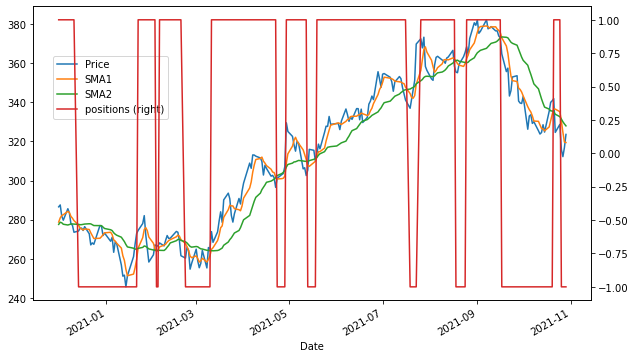

In [32]:
data.dropna(inplace=True)
data['positions'] = np.where(data['SMA1'] > data['SMA2'],1,-1)
ax = data[['Price', 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

# Option Pricing Models


Monte Carlo and Black Scholes model are used to calculate option price.

#                               Monte Carlo European Call

Monte Carlo simulations are used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables.

### FORMULA

In [45]:
def mcs_simulation_np(m,n):       #m is the number of steps and n is the number of simulation
    M = m
    I = n
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [91]:
S0 = 323                 # spot stock price
K = 290                  # strike
T = 0.25                # maturity 
r = 0.0147                # risk free rate 
sigma = 0.30            # diffusion coefficient or volatility
N = 90                   # number of periods or number of time steps  
payoff = "call"         # payoff 

In [92]:
S = mcs_simulation_np(90,10000)

In [93]:
print('Mean of Simulated Prices is {} and standard deviation is "{}!"'.format(S.mean().round(2), S.std().round(2)))

Mean of Simulated Prices is 323.67 and standard deviation is "34.82!"


In [94]:
p = np.mean(np.maximum(S[-1,:] - K,0))
print('European call', str(p))

European call 40.713777382877225


### 2D Figure

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

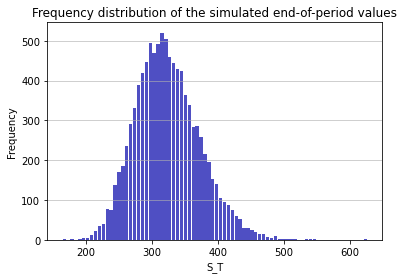

In [38]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[-1,:], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

# Black & Scholes Model European Call

Black&Scholes model estimates the theoretical value of derivatives other investment instruments, taking into account the impact of time and other risk factors.

### FORMULA

In [39]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [40]:
euro_option_bs(323, 290, 0.25, 0.0147, 0.30, 'call')

40.137832085455045

### 2D Figures

In [41]:
S = np.linspace(250,450,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 290, 0.25 , 0.0147, 0.30, 'call')

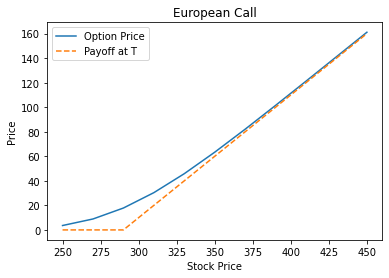

In [42]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-K,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

In [43]:
T = np.linspace(0.25,3,12)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bs(323, 290, T[i], 0.0147, 0.30, 'call')

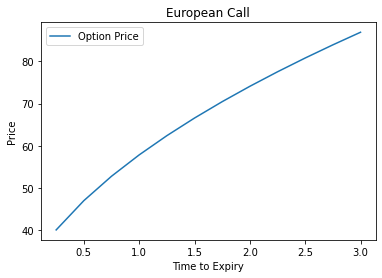

In [44]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])

#           GREEKS

## DELTA

Delta measures how much an option's price can be expected to move for every $1 change in the price of the underlying security or index.

### FORMULA

In [171]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [375]:
delta(323, 290, 0.25, 0.0147, 0, 0.30, 'call')

0.7933145546689343

### 2D Figure

In [376]:
S = np.linspace(250,450,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 290, 0.25, 0.0147, 0, 0.30, 'call')

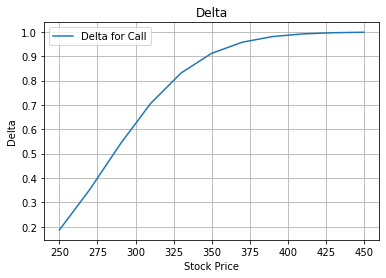

In [377]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')

plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])

### 3D Figure

In [441]:
S = np.linspace(250, 450, 51)
T = np.linspace(0.1, 0.5, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 290, T[i], 0.0147, 0, 0.3, 'call')

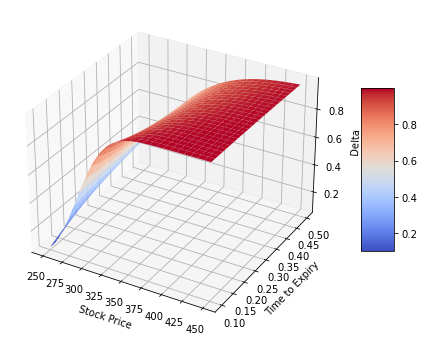

In [442]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [440]:
d = delta(323, 290, 0.25, 0.0147, 0, 0.3, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.7933 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.7933 .


## GAMMA

Gamma is the rate of change in an option's delta per 1-point move in the underlying asset's price.

### FORMULA

In [169]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [378]:
gamma(323, 290, 0.25, 0.0147, 0, 0.30, 'call')


0.005892863472419054

### 2D Figure

In [379]:
S = np.linspace(250,450,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 290, 0.25, 0.0147, 0, 0.30, 'call')

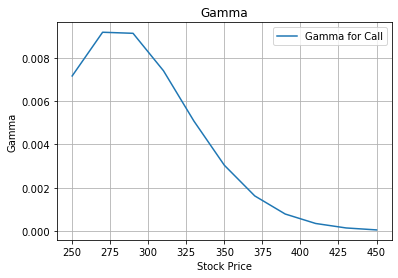

In [380]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

### 3D Figure

In [443]:
S = np.linspace(250, 350, 51)
T = np.linspace(0.1, 0.5, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 290, T[i], 0.0147, 0, 0.3, 'call')

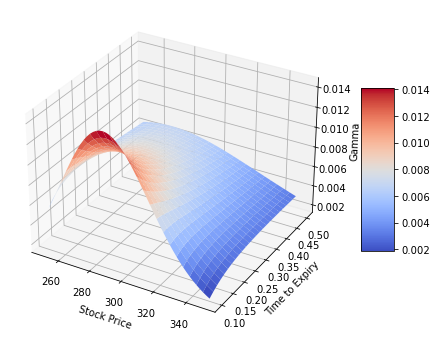

In [444]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

## SPEED

Speed measures the rate of change in Gamma with respect to changes in the underlying price.

### FORMULA

In [179]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [381]:
speed(323, 290, 0.25, 0.0147, 0, 0.30, 'call')

-5.886636142508598e-05

### 2D Figure

In [382]:
S = np.linspace(250,450,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 290, 0.25, 0.0147, 0, 0.30, 'call')

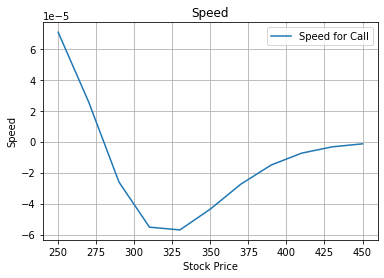

In [383]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call'])

### 3D Figure

In [425]:
S = np.linspace(250, 350, 51)
T = np.linspace(0.1, 0.5, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 290, T[i], 0.0147, 0, 0.3, 'call')

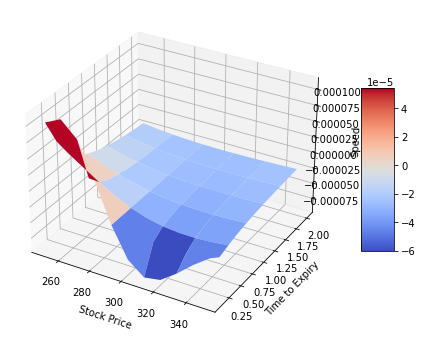

In [426]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

## THETA

Theta refers to the rate of decline in the value of an option over time.

### FORMULA

In [427]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [428]:
theta(323, 290, 0.25, 0.0147, 0, 0.30, 'call')

30.84255559999771

### 2D Figure

In [429]:
T = np.linspace(0.1,10,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(323, 290, T[i], 0.0147, 0, 0.3, 'call')

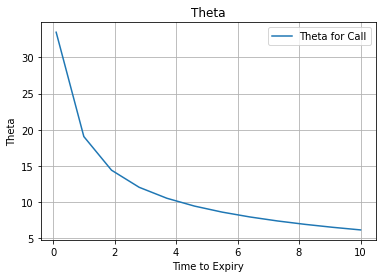

In [430]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')

plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])

### 3D Figure

In [431]:
S = np.linspace(250, 350, 51)
T = np.linspace(0.1, 0.6, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 290, T[i], 0.0147, 0, 0.3, 'call')

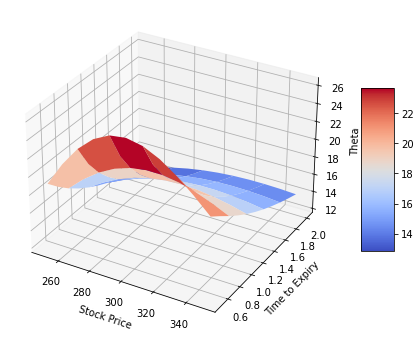

In [432]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

## RHO

Rho measures the price change for a derivative relative to a change in the risk-free rate of interest.

### FORMULA

In [388]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [412]:
rho(323, 290, 0.25, 0.0147, 0, 0.3, 'call')

54.02569226815268

### 2D Figure

In [390]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(323, 290, 0.25, r[i], 0, 0.3, 'call')

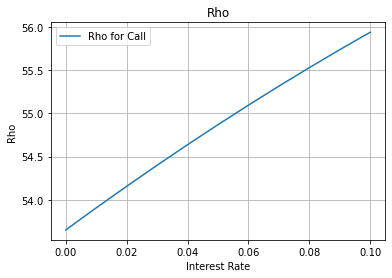

In [391]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call'])

### 3D Figure

In [435]:
S = np.linspace(250, 350, 51)
T = np.linspace(0.1, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 290, T[i], 0.0147, 0, 0.3, 'call')

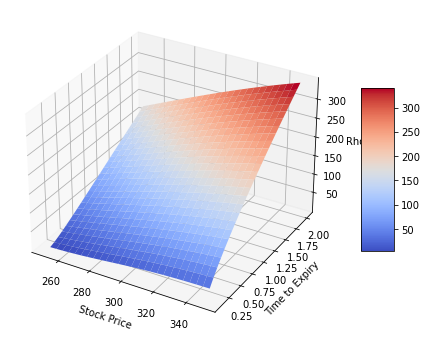

In [436]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

## VEGA

Vega measures an option price's value relative to changes in implied volatility of an underlying asset.

### FORMULA

In [195]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [392]:
vega(323, 290, 0.25, 0.0147, 0, 0.3, 'call')

46.109741491050556

### 2D Figure

In [417]:
vol = np.linspace(0.1,0.9,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(323, 290, 0.25, 0.0147, 0, vol[i], 'call')

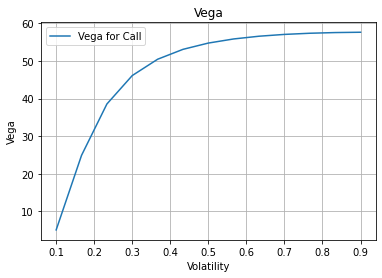

In [418]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call'])

### 3D Figure

In [437]:
S = np.linspace(250, 350, 51)
T = np.linspace(0.1, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 290, T[i], 0.0147, 0, 0.3, 'call')

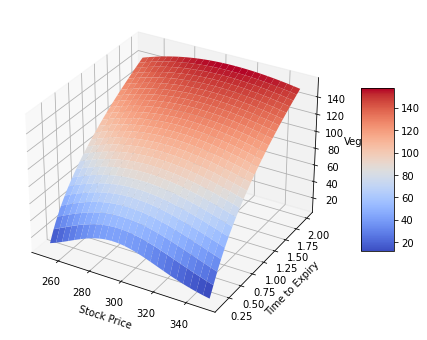

In [438]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [439]:
v = vega(323, 290, 0.25, 0.0147, 0, 0.3, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 46.1097 . If the volatility increases 1%, then the value of the option will increase $ 0.461097 .
